In [1]:
!pip install fiftyone
!pip install torch torchvision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.8/57.8 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.9/108.9 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.6/70.6 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 677.1/677.1 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.3/70.3 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.5/192.5 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.5/88.5 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) 

# Imports

In [2]:
import fiftyone as fo
import fiftyone.zoo as foz
import torch
import torchvision
from fiftyone.core.dataset import Dataset
from PIL import Image
from torchvision.transforms import functional as func
from fiftyone import ViewField as F
import matplotlib.pyplot as plt
import numpy as np

Migrating database to v0.23.2


INFO:fiftyone.migrations.runner:Migrating database to v0.23.2


# Loading Coco dataset 2017, validation split

In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
dataset = foz.load_zoo_dataset(
    "coco-2017",
    split="validation",
    dataset_name="evaluate-detections-tutorial",
)
dataset.persistent = True

INFO:fiftyone.zoo.datasets:Downloading split 'validation' to '/root/fiftyone/coco-2017/validation' if necessary


INFO:fiftyone.utils.coco:Downloading annotations to '/root/fiftyone/coco-2017/tmp-download/annotations_trainval2017.zip'


 100% |██████|    1.9Gb/1.9Gb [2.8s elapsed, 0s remaining, 735.7Mb/s]      


INFO:eta.core.utils: 100% |██████|    1.9Gb/1.9Gb [2.8s elapsed, 0s remaining, 735.7Mb/s]      


Extracting annotations to '/root/fiftyone/coco-2017/raw/instances_val2017.json'


INFO:fiftyone.utils.coco:Extracting annotations to '/root/fiftyone/coco-2017/raw/instances_val2017.json'


INFO:fiftyone.utils.coco:Downloading images to '/root/fiftyone/coco-2017/tmp-download/val2017.zip'


 100% |██████|    6.1Gb/6.1Gb [8.9s elapsed, 0s remaining, 570.8Mb/s]       


INFO:eta.core.utils: 100% |██████|    6.1Gb/6.1Gb [8.9s elapsed, 0s remaining, 570.8Mb/s]       


Extracting images to '/root/fiftyone/coco-2017/validation/data'


INFO:fiftyone.utils.coco:Extracting images to '/root/fiftyone/coco-2017/validation/data'


Writing annotations to '/root/fiftyone/coco-2017/validation/labels.json'


INFO:fiftyone.utils.coco:Writing annotations to '/root/fiftyone/coco-2017/validation/labels.json'


Dataset info written to '/root/fiftyone/coco-2017/info.json'


INFO:fiftyone.zoo.datasets:Dataset info written to '/root/fiftyone/coco-2017/info.json'


Loading 'coco-2017' split 'validation'


INFO:fiftyone.zoo.datasets:Loading 'coco-2017' split 'validation'


 100% |███████████████| 5000/5000 [35.2s elapsed, 0s remaining, 115.9 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 5000/5000 [35.2s elapsed, 0s remaining, 115.9 samples/s]      


Dataset 'evaluate-detections-tutorial' created


INFO:fiftyone.zoo.datasets:Dataset 'evaluate-detections-tutorial' created


# Launching fiftyone app

In [4]:
session = fo.launch_app(dataset)


Welcome to

███████╗██╗███████╗████████╗██╗   ██╗ ██████╗ ███╗   ██╗███████╗
██╔════╝██║██╔════╝╚══██╔══╝╚██╗ ██╔╝██╔═══██╗████╗  ██║██╔════╝
█████╗  ██║█████╗     ██║    ╚████╔╝ ██║   ██║██╔██╗ ██║█████╗
██╔══╝  ██║██╔══╝     ██║     ╚██╔╝  ██║   ██║██║╚██╗██║██╔══╝
██║     ██║██║        ██║      ██║   ╚██████╔╝██║ ╚████║███████╗
╚═╝     ╚═╝╚═╝        ╚═╝      ╚═╝    ╚═════╝ ╚═╝  ╚═══╝╚══════╝ v0.23.2

If you're finding FiftyOne helpful, here's how you can get involved:

|
|  ⭐⭐⭐ Give the project a star on GitHub ⭐⭐⭐
|  https://github.com/voxel51/fiftyone
|
|  🚀🚀🚀 Join the FiftyOne Slack community 🚀🚀🚀
|  https://slack.voxel51.com
|



INFO:fiftyone.core.session.session:
Welcome to

███████╗██╗███████╗████████╗██╗   ██╗ ██████╗ ███╗   ██╗███████╗
██╔════╝██║██╔════╝╚══██╔══╝╚██╗ ██╔╝██╔═══██╗████╗  ██║██╔════╝
█████╗  ██║█████╗     ██║    ╚████╔╝ ██║   ██║██╔██╗ ██║█████╗
██╔══╝  ██║██╔══╝     ██║     ╚██╔╝  ██║   ██║██║╚██╗██║██╔══╝
██║     ██║██║        ██║      ██║   ╚██████╔╝██║ ╚████║███████╗
╚═╝     ╚═╝╚═╝        ╚═╝      ╚═╝    ╚═════╝ ╚═╝  ╚═══╝╚══════╝ v0.23.2

If you're finding FiftyOne helpful, here's how you can get involved:

|
|  ⭐⭐⭐ Give the project a star on GitHub ⭐⭐⭐
|  https://github.com/voxel51/fiftyone
|
|  🚀🚀🚀 Join the FiftyOne Slack community 🚀🚀🚀
|  https://slack.voxel51.com
|



In [5]:
session.freeze()  # screenshot the active App for sharing

# Information about the dataset

In [6]:
print(dataset)

Name:        evaluate-detections-tutorial
Media type:  image
Num samples: 5000
Persistent:  True
Tags:        []
Sample fields:
    id:           fiftyone.core.fields.ObjectIdField
    filepath:     fiftyone.core.fields.StringField
    tags:         fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:     fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    ground_truth: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)


In [7]:
sample = dataset.first()
print(sample.ground_truth.detections[0])

<Detection: {
    'id': '658e7f103e559c0fc6455ecc',
    'attributes': {},
    'tags': [],
    'label': 'potted plant',
    'bounding_box': [
        0.37028125,
        0.3345305164319249,
        0.038593749999999996,
        0.16314553990610328,
    ],
    'mask': None,
    'confidence': None,
    'index': None,
    'supercategory': 'furniture',
    'iscrowd': 0,
}>


# Faster_RCNN_Mobilenet

In [8]:
model = torchvision.models.detection.fasterrcnn_mobilenet_v3_large_320_fpn(pretrained=True)
model.to(device)
model.eval()

print("Model ready")

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_MobileNet_V3_Large_320_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_MobileNet_V3_Large_320_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_mobilenet_v3_large_320_fpn-907ea3f9.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_mobilenet_v3_large_320_fpn-907ea3f9.pth
100%|██████████| 74.2M/74.2M [00:00<00:00, 147MB/s]


Model ready


In [9]:
predictions_view = dataset.take(5000, seed=51)

In [10]:
# Get class list
classes = dataset.default_classes

# Add predictions to samples
with fo.ProgressBar() as pb:
    for sample in pb(predictions_view):
        # Load image
        image = Image.open(sample.filepath)
        image = func.to_tensor(image).to(device)
        c, h, w = image.shape

        # Perform inference
        preds = model([image])[0]
        labels = preds["labels"].cpu().detach().numpy()
        scores = preds["scores"].cpu().detach().numpy()
        boxes = preds["boxes"].cpu().detach().numpy()

        # Convert detections to FiftyOne format
        detections = []
        for label, score, box in zip(labels, scores, boxes):
            # Convert to [top-left-x, top-left-y, width, height]
            # in relative coordinates in [0, 1] x [0, 1]
            x1, y1, x2, y2 = box
            rel_box = [x1 / w, y1 / h, (x2 - x1) / w, (y2 - y1) / h]

            detections.append(
                fo.Detection(
                    label=classes[label],
                    bounding_box=rel_box,
                    confidence=score
                )
            )

        # Save predictions to dataset
        sample["faster_rcnn_mobilenet"] = fo.Detections(detections=detections)
        sample.save()

print("Finished adding predictions")

 100% |███████████████| 5000/5000 [4.5m elapsed, 0s remaining, 18.8 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 5000/5000 [4.5m elapsed, 0s remaining, 18.8 samples/s]      


Finished adding predictions


In [11]:
results = predictions_view.evaluate_detections(
    "faster_rcnn_mobilenet",
    gt_field="ground_truth",
    eval_key="eval",
    compute_mAP=True,
)

Evaluating detections...


INFO:fiftyone.utils.eval.detection:Evaluating detections...


 100% |███████████████| 5000/5000 [4.5m elapsed, 0s remaining, 24.0 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 5000/5000 [4.5m elapsed, 0s remaining, 24.0 samples/s]      


Performing IoU sweep...


INFO:fiftyone.utils.eval.coco:Performing IoU sweep...


 100% |███████████████| 5000/5000 [2.5m elapsed, 0s remaining, 29.1 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 5000/5000 [2.5m elapsed, 0s remaining, 29.1 samples/s]      


In [12]:
counts = dataset.count_values("ground_truth.detections.label")
classes_sort = sorted(counts, key=counts.get, reverse=True)[:]

## mAP

In [13]:
def calc_map(result):
  print('mAP : ', result.mAP())
  result.print_report(classes=classes_sort)
  plot = result.plot_pr_curves(classes=classes_sort)
  plot.show()

In [14]:
calc_map(results)

mAP :  0.22742567207669356
                precision    recall  f1-score   support

        person       0.47      0.68      0.55     14401
           car       0.21      0.43      0.28      2121
         chair       0.21      0.39      0.27      1893
          book       0.35      0.46      0.40      1716
        bottle       0.17      0.34      0.22      1116
           cup       0.17      0.35      0.23       920
  dining table       0.23      0.53      0.32       698
 traffic light       0.11      0.22      0.15       637
          bowl       0.20      0.50      0.29       644
       handbag       0.08      0.13      0.10       540
          bird       0.37      0.52      0.43       626
          boat       0.21      0.41      0.28       484
         truck       0.18      0.49      0.26       415
         bench       0.15      0.31      0.20       413
      umbrella       0.35      0.52      0.42       454
           cow       0.39      0.68      0.50       499
        banana      

## Accuarcy, Precision, Recall

In [15]:
d = results.metrics(classes_sort)
acc = d['accuracy']
pre = d['precision']
rec = d['recall']
fsc= d['fscore']

In [16]:
print('accuracy : ', acc)
print('precision : ', pre)
print('recall : ', rec)
print('fscore : ', fsc)

accuracy :  0.24861036591909003
precision :  0.31368301334994175
recall :  0.5451294117647059
fscore :  0.3982192887467987


## Confusion Matrix

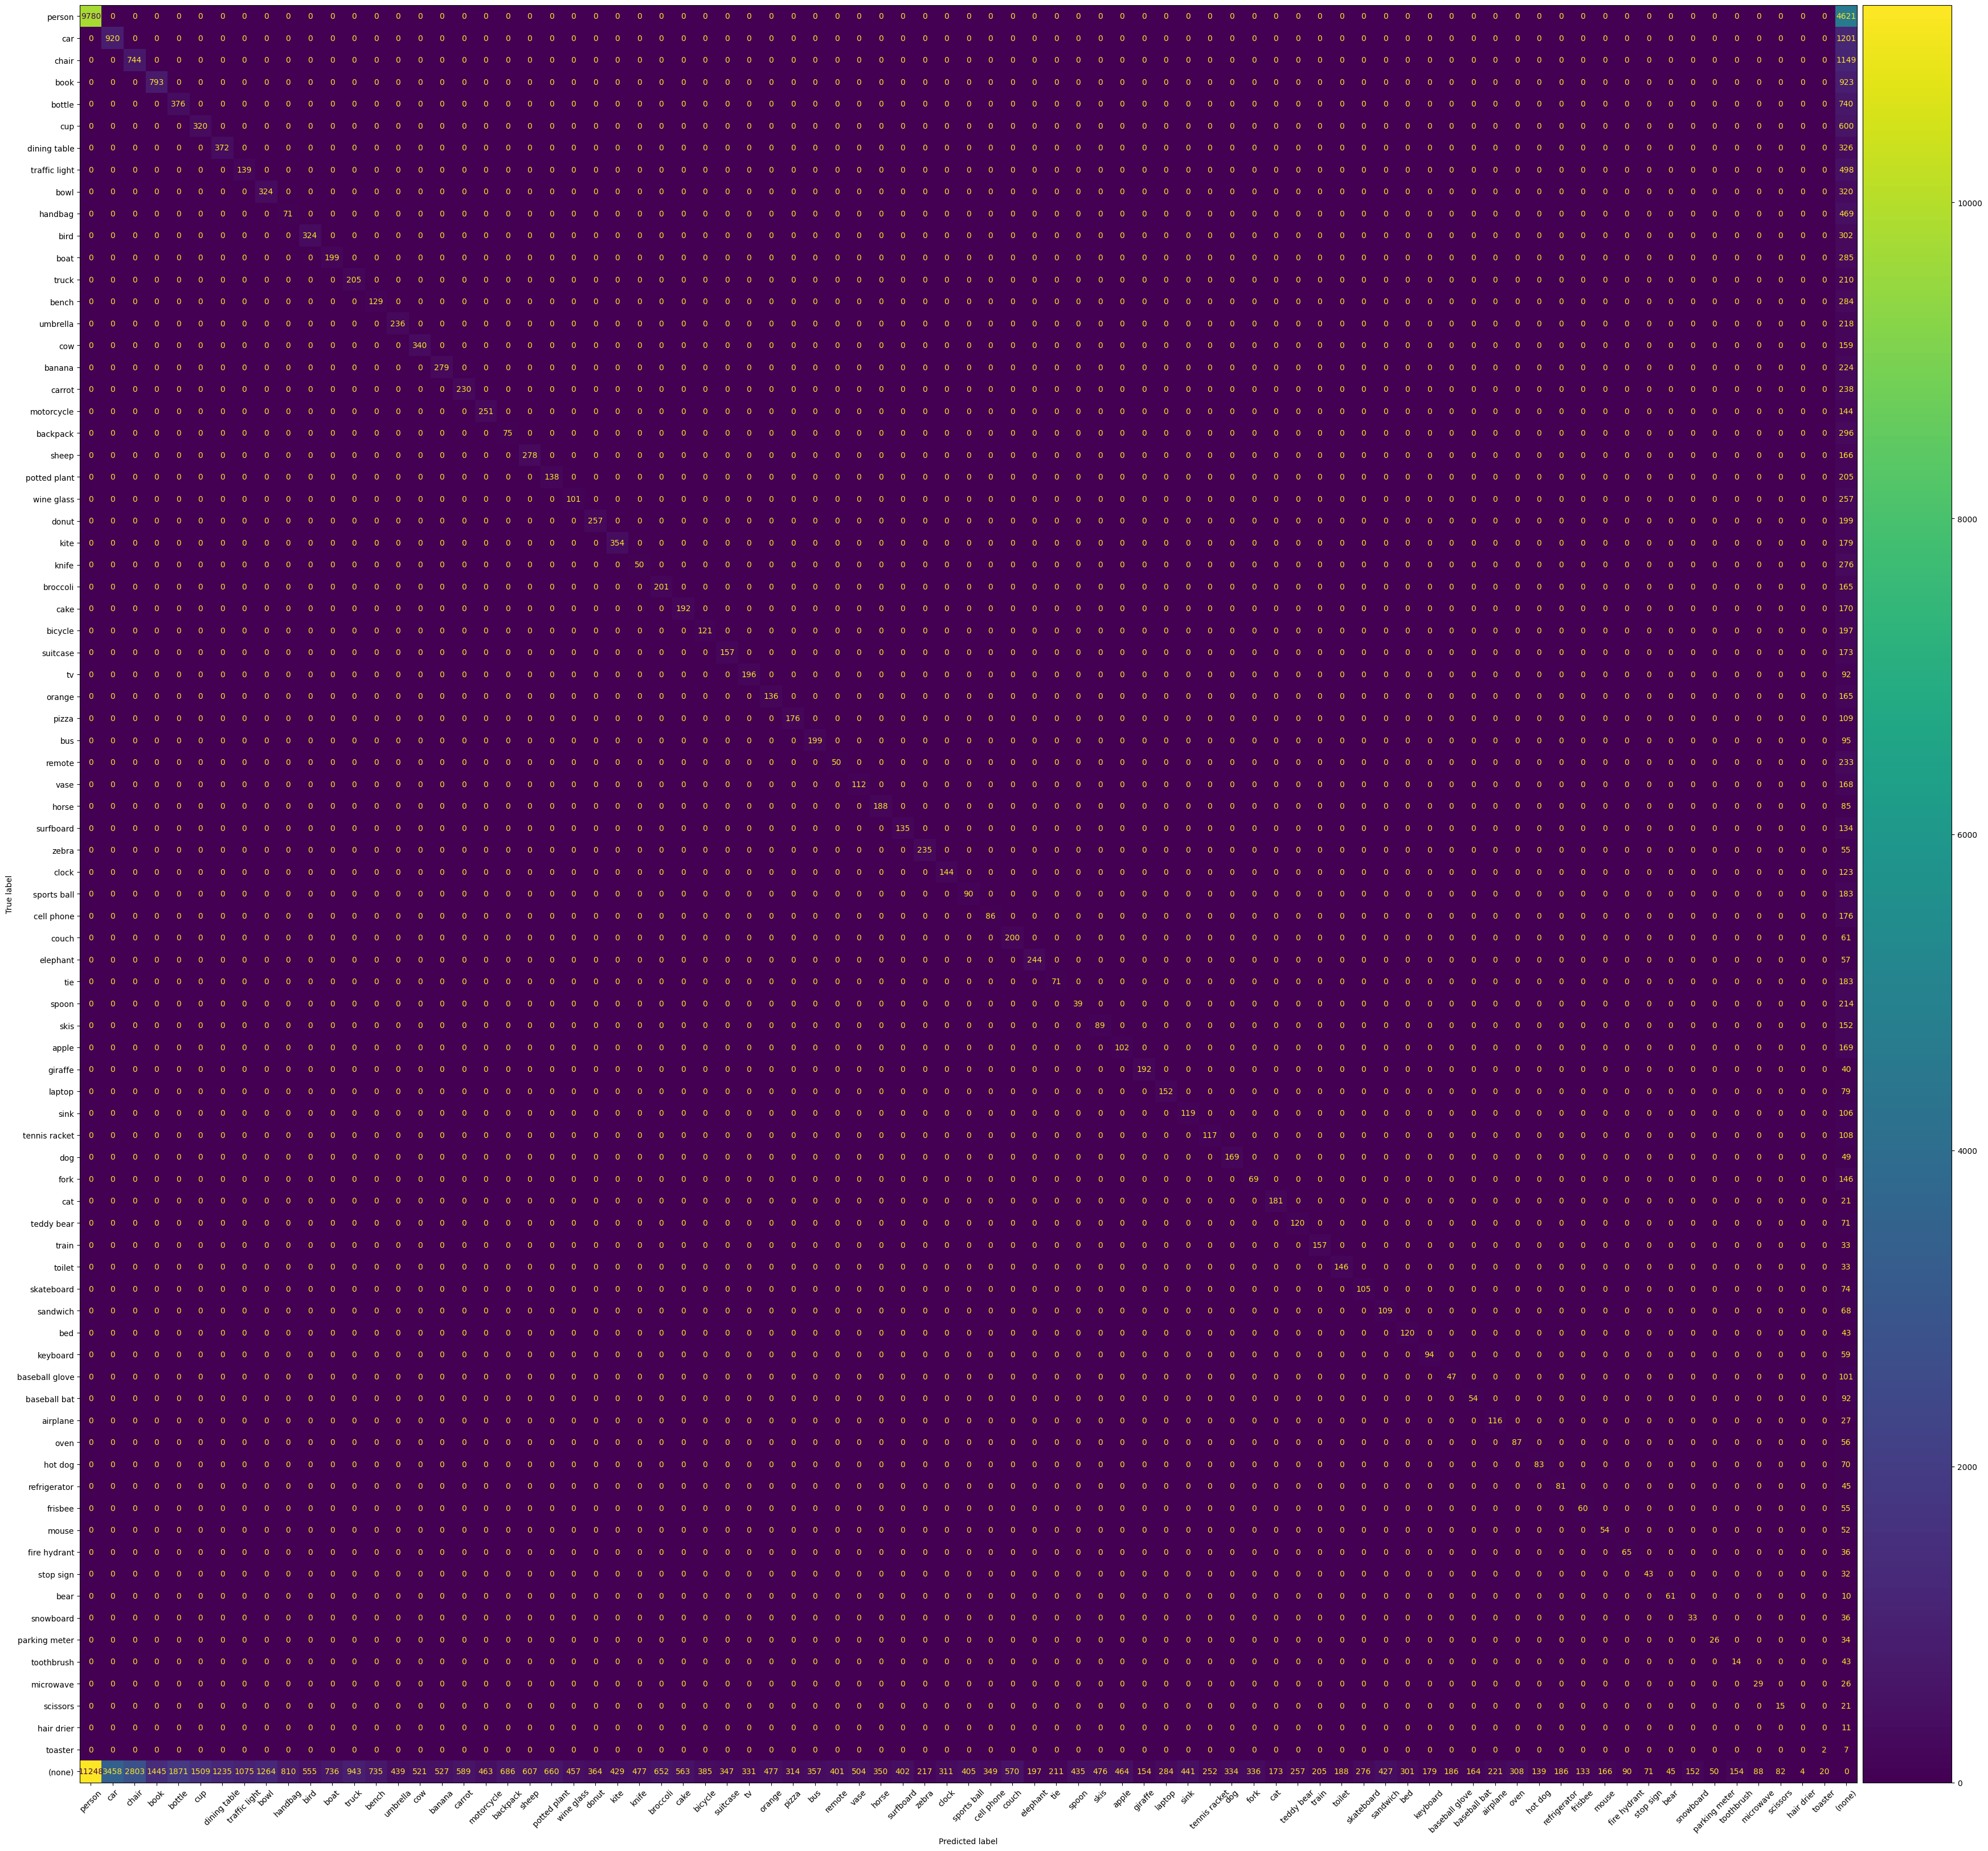

In [17]:
plot = results.plot_confusion_matrix(classes=classes_sort[:], backend="matplotlib", figsize=(35, 35))
plot.show()

In [18]:
plot = results.plot_confusion_matrix(classes=classes_sort[:10])
plot.show()

/usr/local/lib/python3.10/dist-packages/fiftyone/core/plots/plotly.py:1575: UserWarning:

Interactive plots are currently only supported in Jupyter notebooks. Support outside of notebooks and in Google Colab and Databricks will be included in an upcoming release. In the meantime, you can still use this plot, but note that (i) selecting data will not trigger callbacks, and (ii) you must manually call `plot.show()` to launch a new plot that reflects the current state of an attached session.

See https://docs.voxel51.com/user_guide/plots.html#working-in-notebooks for more information.



In [19]:
eval_patches = predictions_view.to_evaluation_patches("eval")
print(eval_patches.count_values("type"))

{'tp': 17449, 'fp': 50690, 'fn': 19332}


# IoU

In [20]:
iou = eval_patches.count_values('iou')
x = list(iou.items())
sum_iou = 0.0
for i,v in x:
  if not i:
    continue
  sum_iou += (i * v)

print('IOU Score', sum_iou / sum(iou.values()))

IOU Score 0.15366222070868957


In [21]:
eval_patches = predictions_view.to_evaluation_patches("eval")
print(eval_patches)

print(eval_patches.count_values("type"))

session.view = eval_patches

Dataset:     evaluate-detections-tutorial
Media type:  image
Num patches: 87471
Patch fields:
    id:                    fiftyone.core.fields.ObjectIdField
    sample_id:             fiftyone.core.fields.ObjectIdField
    filepath:              fiftyone.core.fields.StringField
    tags:                  fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:              fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    ground_truth:          fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    faster_rcnn_mobilenet: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    crowd:                 fiftyone.core.fields.BooleanField
    type:                  fiftyone.core.fields.StringField
    iou:                   fiftyone.core.fields.FloatField
View stages:
    1. Take(size=5000, seed=51)
    2. ToEvaluationPatches(eval_key='eval', config=None)
{'fn': 19332, 'fp': 50690, 'tp': 1

In [22]:
session.freeze()  # screenshot the active App for sharing

# Success cases

In [23]:
success_view = predictions_view.filter_labels("faster_rcnn_mobilenet", F("confidence") > 0.75, only_matches=False)

In [24]:
print(success_view)

Dataset:     evaluate-detections-tutorial
Media type:  image
Num samples: 5000
Sample fields:
    id:                    fiftyone.core.fields.ObjectIdField
    filepath:              fiftyone.core.fields.StringField
    tags:                  fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:              fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    ground_truth:          fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    faster_rcnn_mobilenet: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    eval_tp:               fiftyone.core.fields.IntField
    eval_fp:               fiftyone.core.fields.IntField
    eval_fn:               fiftyone.core.fields.IntField
View stages:
    1. Take(size=5000, seed=51)
    2. FilterLabels(field='faster_rcnn_mobilenet', filter={'$gt': ['$$this.confidence', 0.75]}, only_matches=False, trajectories=False)


In [25]:
session.view = success_view

# Failure cases

In [26]:
session.freeze()  # screenshot the active App for sharing

In [27]:
failure_view = predictions_view.filter_labels("faster_rcnn_mobilenet", F("confidence") <= 0.3, only_matches=False)

In [28]:
print(failure_view)

Dataset:     evaluate-detections-tutorial
Media type:  image
Num samples: 5000
Sample fields:
    id:                    fiftyone.core.fields.ObjectIdField
    filepath:              fiftyone.core.fields.StringField
    tags:                  fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:              fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    ground_truth:          fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    faster_rcnn_mobilenet: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    eval_tp:               fiftyone.core.fields.IntField
    eval_fp:               fiftyone.core.fields.IntField
    eval_fn:               fiftyone.core.fields.IntField
View stages:
    1. Take(size=5000, seed=51)
    2. FilterLabels(field='faster_rcnn_mobilenet', filter={'$lte': ['$$this.confidence', 0.3]}, only_matches=False, trajectories=False)


In [29]:
session.view = failure_view

In [30]:
session.freeze()  # screenshot the active App for sharing

# Working with another dataset

# Loading VOC 2012 dataset, validation split

In [31]:
dataset_voc2012 = foz.load_zoo_dataset("voc-2012", split="validation")

INFO:fiftyone.zoo.datasets:Downloading split 'validation' to '/root/fiftyone/voc-2012/validation'


100%|██████████| 1999639040/1999639040 [01:07<00:00, 29561981.24it/s]


Extracting /root/fiftyone/voc-2012/tmp-download/VOCtrainval_11-May-2012.tar to /root/fiftyone/voc-2012/tmp-download
 100% |███████████████| 5823/5823 [1.4m elapsed, 0s remaining, 75.2 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 5823/5823 [1.4m elapsed, 0s remaining, 75.2 samples/s]      


Dataset info written to '/root/fiftyone/voc-2012/info.json'


INFO:fiftyone.zoo.datasets:Dataset info written to '/root/fiftyone/voc-2012/info.json'


Loading 'voc-2012' split 'validation'


INFO:fiftyone.zoo.datasets:Loading 'voc-2012' split 'validation'


 100% |███████████████| 5823/5823 [19.7s elapsed, 0s remaining, 293.0 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 5823/5823 [19.7s elapsed, 0s remaining, 293.0 samples/s]      


Dataset 'voc-2012-validation' created


INFO:fiftyone.zoo.datasets:Dataset 'voc-2012-validation' created


In [32]:
predictions_view_voc2012 = dataset_voc2012.take(5000, seed=51)

In [33]:
# Get class list
classes = dataset.default_classes

# Add predictions to samples
with fo.ProgressBar() as pb:
    for sample in pb(predictions_view_voc2012):
        # Load image
        image = Image.open(sample.filepath)
        image = func.to_tensor(image).to(device)
        c, h, w = image.shape

        # Perform inference
        preds = model([image])[0]
        labels = preds["labels"].cpu().detach().numpy()
        scores = preds["scores"].cpu().detach().numpy()
        boxes = preds["boxes"].cpu().detach().numpy()

        # Convert detections to FiftyOne format
        detections = []
        for label, score, box in zip(labels, scores, boxes):
            # Convert to [top-left-x, top-left-y, width, height]
            # in relative coordinates in [0, 1] x [0, 1]
            x1, y1, x2, y2 = box
            rel_box = [x1 / w, y1 / h, (x2 - x1) / w, (y2 - y1) / h]

            detections.append(
                fo.Detection(
                    label=classes[label],
                    bounding_box=rel_box,
                    confidence=score
                )
            )

        # Save predictions to dataset
        sample["faster_rcnn_mobilenet"] = fo.Detections(detections=detections)
        sample.save()

print("Finished adding predictions")

 100% |███████████████| 5000/5000 [3.8m elapsed, 0s remaining, 23.9 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 5000/5000 [3.8m elapsed, 0s remaining, 23.9 samples/s]      


Finished adding predictions


In [34]:
results_voc2012 = predictions_view_voc2012.evaluate_detections(
    "faster_rcnn_mobilenet",
    gt_field="ground_truth",
    eval_key="eval",
    compute_mAP=True,
)

Evaluating detections...


INFO:fiftyone.utils.eval.detection:Evaluating detections...


 100% |███████████████| 5000/5000 [2.2m elapsed, 0s remaining, 28.1 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 5000/5000 [2.2m elapsed, 0s remaining, 28.1 samples/s]      


Performing IoU sweep...


INFO:fiftyone.utils.eval.coco:Performing IoU sweep...


 100% |███████████████| 5000/5000 [1.5m elapsed, 0s remaining, 46.0 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 5000/5000 [1.5m elapsed, 0s remaining, 46.0 samples/s]      


In [35]:
counts = dataset_voc2012.count_values("ground_truth.detections.label")
classes_sort = sorted(counts, key=counts.get, reverse=True)[:]

## mAP

In [36]:
calc_map(results_voc2012)

mAP :  0.3160159989731205
              precision    recall  f1-score   support

      person       0.30      0.80      0.44      4382
       chair       0.21      0.68      0.32      1242
         car       0.26      0.70      0.38      1026
         dog       0.47      0.87      0.61       671
      bottle       0.19      0.49      0.27       662
        bird       0.33      0.71      0.45       551
         cat       0.54      0.93      0.68       527
 pottedplant       0.00      0.00      0.00       476
        boat       0.21      0.62      0.32       414
       sheep       0.35      0.75      0.48       368
   aeroplane       0.00      0.00      0.00       402
   tvmonitor       0.00      0.00      0.00       352
        sofa       0.00      0.00      0.00       325
     bicycle       0.38      0.80      0.52       328
   motorbike       0.00      0.00      0.00       322
 diningtable       0.00      0.00      0.00       316
       horse       0.45      0.88      0.59       327
 

## Accuarcy, Precision, Recall

In [37]:
d = results_voc2012.metrics(classes_sort)
acc = d['accuracy']
pre = d['precision']
rec = d['recall']
fsc= d['fscore']

In [38]:
print('accuracy : ', acc)
print('precision : ', pre)
print('recall : ', rec)
print('fscore : ', fsc)

accuracy :  0.2591398812188498
precision :  0.30338923829489867
recall :  0.6398673544583641
fscore :  0.4116141265702773


## Confusion Matrix

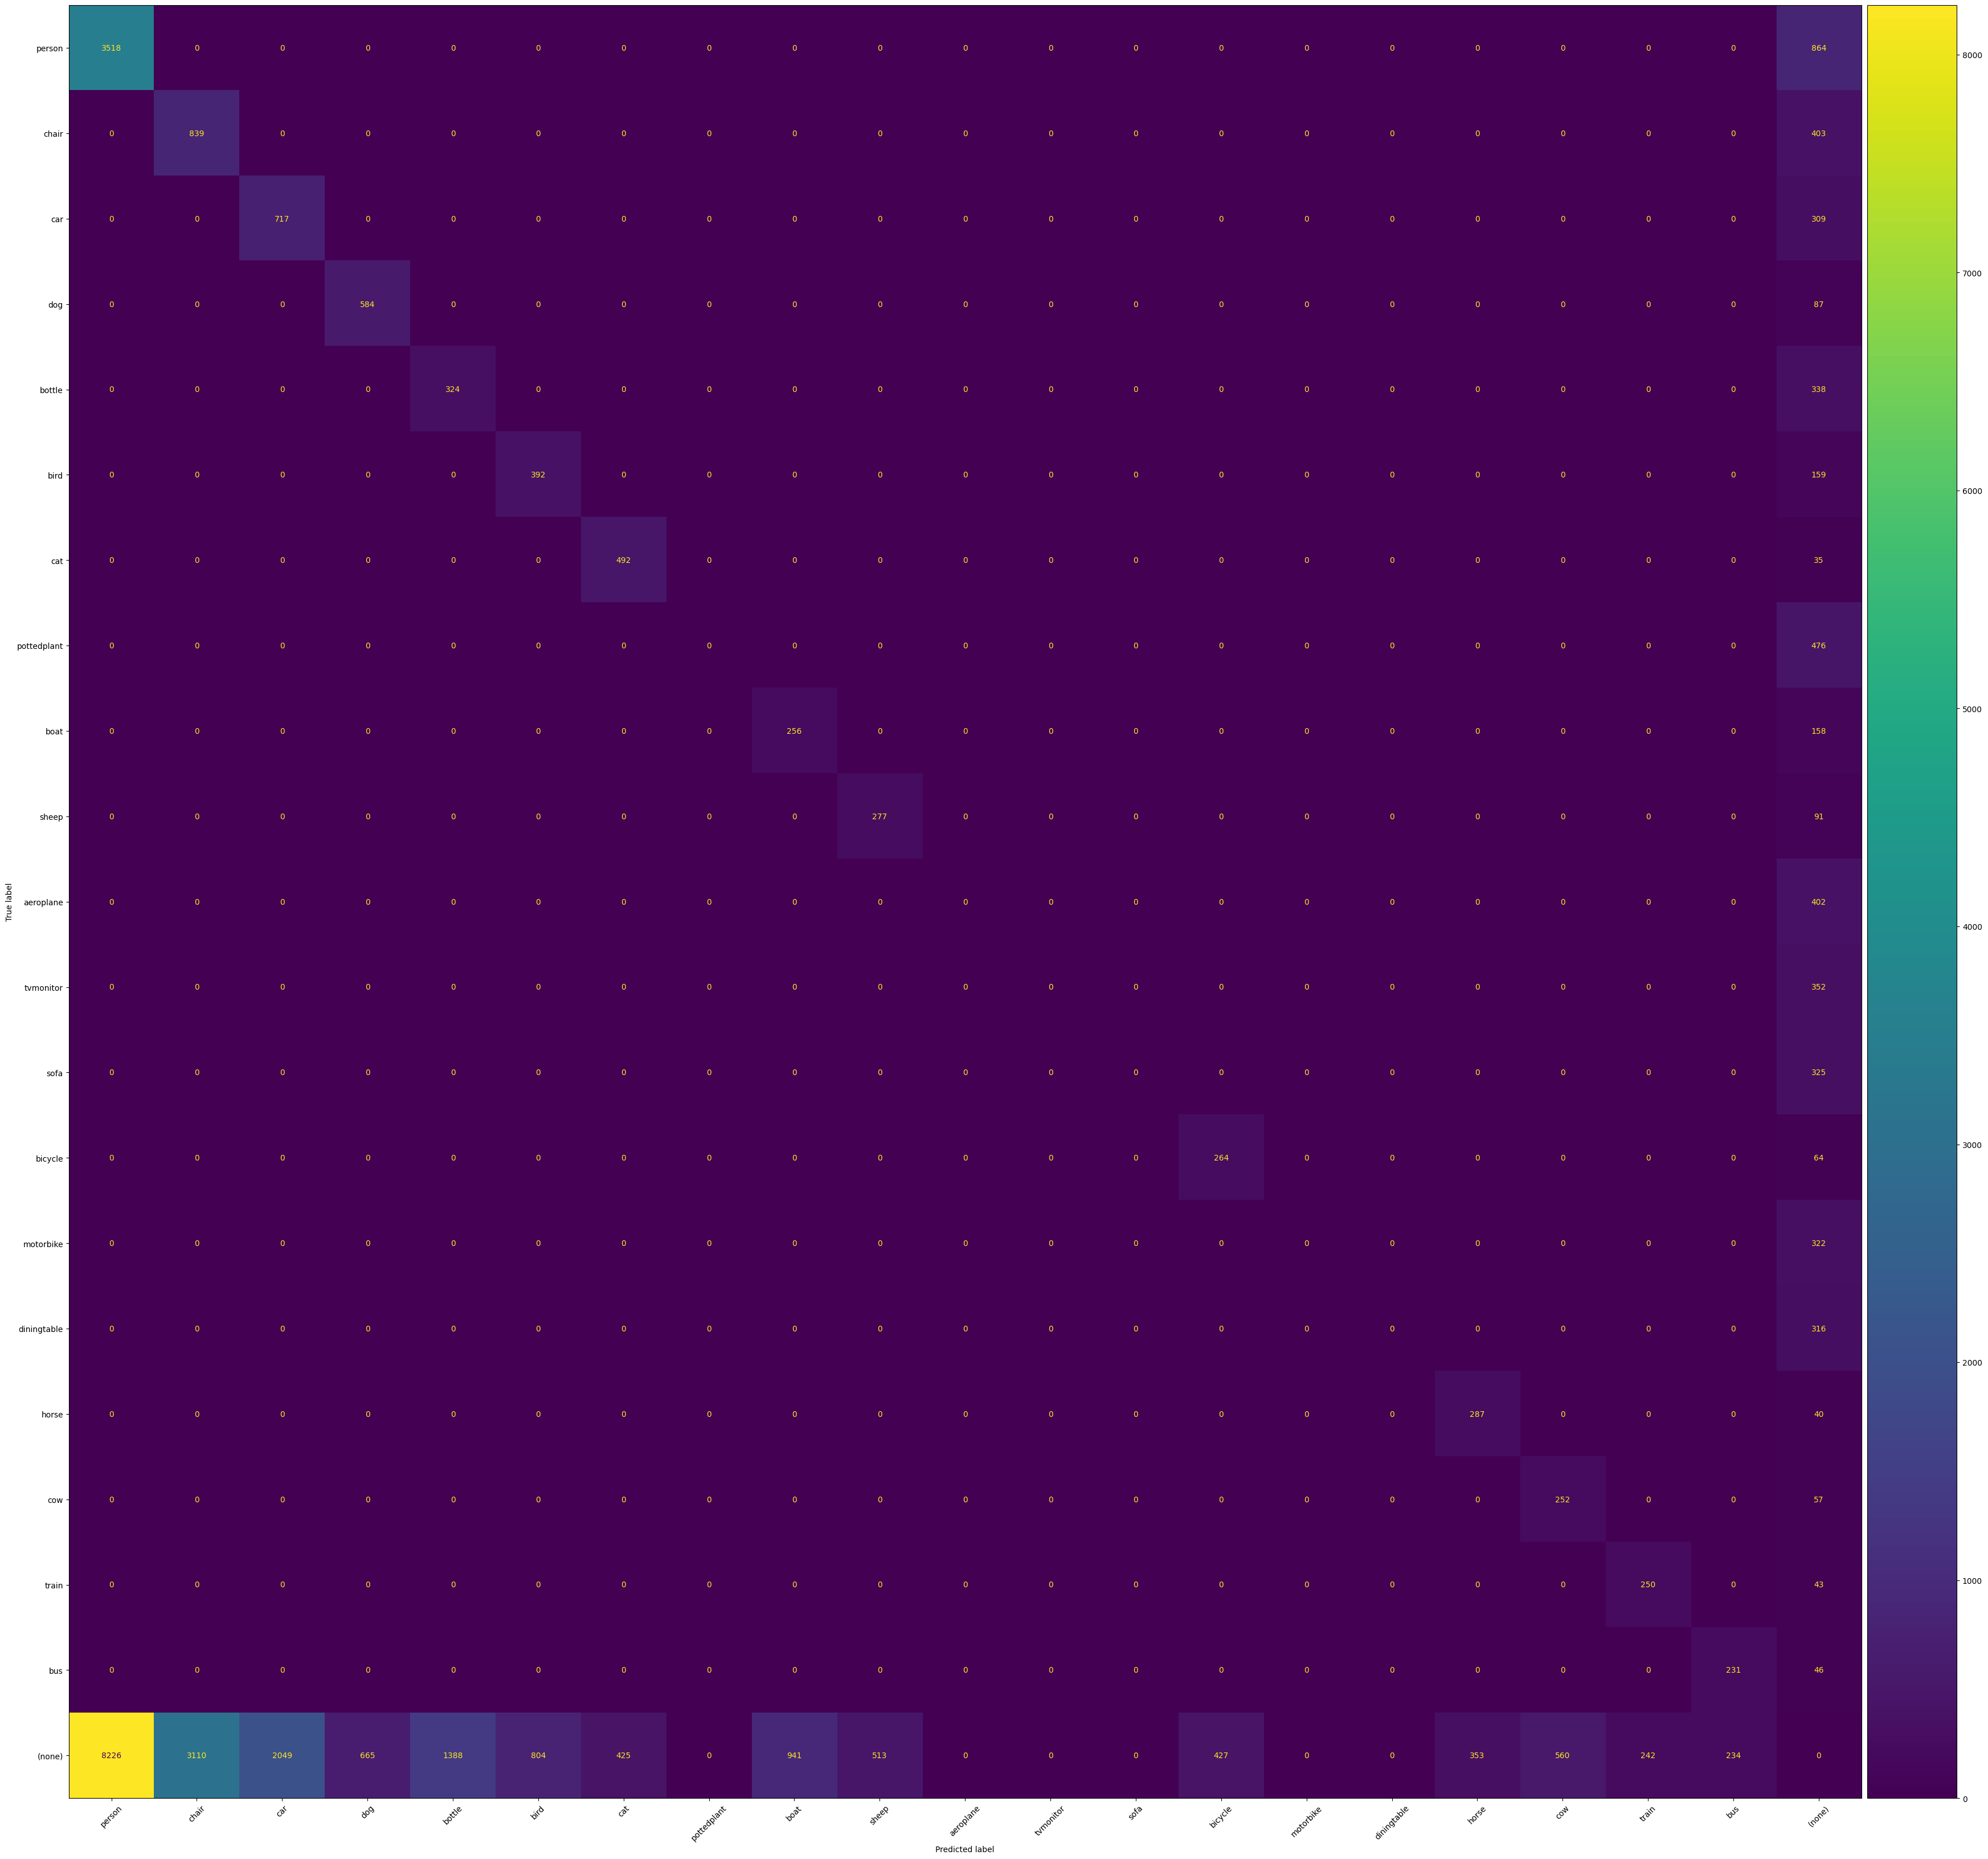

In [39]:
plot = results_voc2012.plot_confusion_matrix(classes=classes_sort[:], backend="matplotlib", figsize=(35, 35))
plot.show()

In [40]:
plot = results_voc2012.plot_confusion_matrix(classes=classes_sort[:10])
plot.show()

/usr/local/lib/python3.10/dist-packages/fiftyone/core/plots/plotly.py:1575: UserWarning:

Interactive plots are currently only supported in Jupyter notebooks. Support outside of notebooks and in Google Colab and Databricks will be included in an upcoming release. In the meantime, you can still use this plot, but note that (i) selecting data will not trigger callbacks, and (ii) you must manually call `plot.show()` to launch a new plot that reflects the current state of an attached session.

See https://docs.voxel51.com/user_guide/plots.html#working-in-notebooks for more information.



In [41]:
eval_patches = predictions_view_voc2012.to_evaluation_patches("eval")
print(eval_patches.count_values("type"))

{'fn': 4887, 'tp': 8683, 'fp': 42046}


# IoU

In [42]:
iou = eval_patches.count_values('iou')
x = list(iou.items())
sum_iou = 0.0
for i,v in x:
  if not i:
    continue
  sum_iou += (i * v)

print('IOU Score', sum_iou / sum(iou.values()))

IOU Score 0.1253905234692484


In [43]:
eval_patches = predictions_view_voc2012.to_evaluation_patches("eval")
print(eval_patches)

print(eval_patches.count_values("type"))

session.view = eval_patches

Dataset:     voc-2012-validation
Media type:  image
Num patches: 55616
Patch fields:
    id:                    fiftyone.core.fields.ObjectIdField
    sample_id:             fiftyone.core.fields.ObjectIdField
    filepath:              fiftyone.core.fields.StringField
    tags:                  fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:              fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    ground_truth:          fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    faster_rcnn_mobilenet: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    crowd:                 fiftyone.core.fields.BooleanField
    type:                  fiftyone.core.fields.StringField
    iou:                   fiftyone.core.fields.FloatField
View stages:
    1. Take(size=5000, seed=51)
    2. ToEvaluationPatches(eval_key='eval', config=None)
{'fn': 4887, 'fp': 42046, 'tp': 8683}


In [44]:
session.freeze()  # screenshot the active App for sharing

# Success cases

In [45]:
success_view_voc2012 = predictions_view_voc2012.filter_labels("faster_rcnn_mobilenet", F("confidence") > 0.75, only_matches=False)

In [46]:
print(success_view_voc2012)

Dataset:     voc-2012-validation
Media type:  image
Num samples: 5000
Sample fields:
    id:                    fiftyone.core.fields.ObjectIdField
    filepath:              fiftyone.core.fields.StringField
    tags:                  fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:              fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    ground_truth:          fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    faster_rcnn_mobilenet: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    eval_tp:               fiftyone.core.fields.IntField
    eval_fp:               fiftyone.core.fields.IntField
    eval_fn:               fiftyone.core.fields.IntField
View stages:
    1. Take(size=5000, seed=51)
    2. FilterLabels(field='faster_rcnn_mobilenet', filter={'$gt': ['$$this.confidence', 0.75]}, only_matches=False, trajectories=False)


In [47]:
session.view = success_view_voc2012

In [48]:
session.freeze()  # screenshot the active App for sharing

# Failure cases

In [49]:
failure_view_voc2012 = predictions_view.filter_labels("faster_rcnn_mobilenet", F("confidence") <= 0.3, only_matches=False)

In [50]:
print(failure_view_voc2012)

Dataset:     evaluate-detections-tutorial
Media type:  image
Num samples: 5000
Sample fields:
    id:                    fiftyone.core.fields.ObjectIdField
    filepath:              fiftyone.core.fields.StringField
    tags:                  fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:              fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    ground_truth:          fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    faster_rcnn_mobilenet: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    eval_tp:               fiftyone.core.fields.IntField
    eval_fp:               fiftyone.core.fields.IntField
    eval_fn:               fiftyone.core.fields.IntField
View stages:
    1. Take(size=5000, seed=51)
    2. FilterLabels(field='faster_rcnn_mobilenet', filter={'$lte': ['$$this.confidence', 0.3]}, only_matches=False, trajectories=False)


In [51]:
session.view = failure_view_voc2012

In [52]:
session.freeze()  # screenshot the active App for sharing

# Bonus

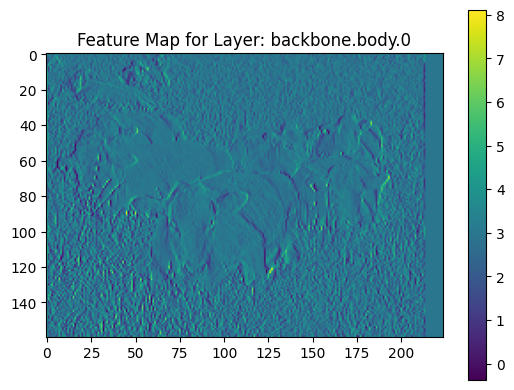

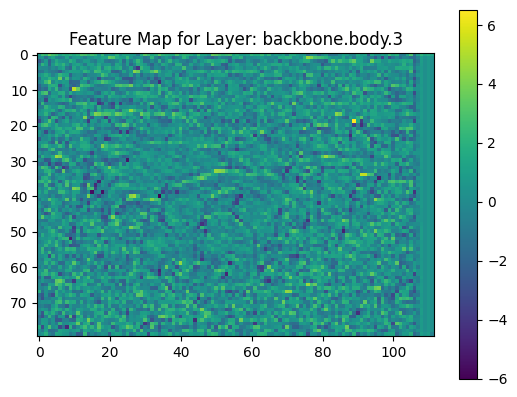

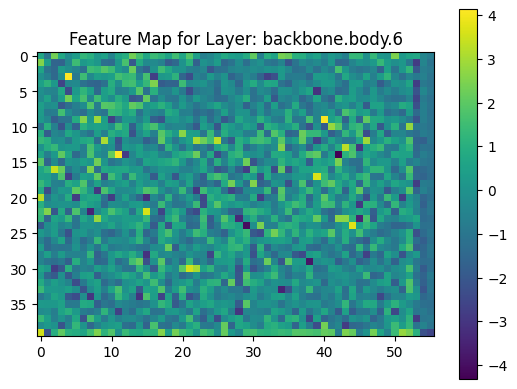

In [54]:
predictions_list = list(predictions_view[0:3])

layer_names = [
    "backbone.body.0",
    "backbone.body.3",
    "backbone.body.6"
]

# Register hooks to retrieve feature maps from chosen layers
feature_maps = {name: None for name in layer_names}
hooks = []

def hook_fn(name):
    def hook(module, input, output):
        feature_maps[name] = output
    return hook

for name in layer_names:
    layer = dict(model.named_modules())[name]
    hooks.append(layer.register_forward_hook(hook_fn(name)))

# Iterate over samples
for idx in range(len(predictions_list)):
    sample = predictions_list[idx]

    # Load image and perform inference
    image = Image.open(sample.filepath)
    image = func.to_tensor(image).to(device)
    with torch.no_grad():
        preds = model([image])[0]

    # Skip samples with no predictions
    if len(preds["labels"]) == 0:
        continue

# Unregister hooks to avoid memory leaks
for hook in hooks:
    hook.remove()

# Visualize feature maps
for name, feature_map in feature_maps.items():
    if feature_map is not None:
        plt.figure()
        plt.imshow(feature_map[0, 0].cpu().detach().numpy(), cmap='viridis')
        plt.title(f"Feature Map for Layer: {name}")
        plt.colorbar()
        plt.show()